<a href="https://colab.research.google.com/github/Raymay3/MAT422/blob/main/HW%204.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Section 4.2. Graph and graph modeling**

Here is a Python program written in Jupyter Notebook format that demonstrates key concepts from Section 4.2 on Graph Modeling. I will cover the following concepts:

- Basic graph representation using adjacency matrix.
- Directed vs. undirected graphs.
- Degree centrality, in-degree, and out-degree.
- Eigenvalues and eigenvectors of the Laplacian matrix.
- Fiedler vector and its use in graph partitioning.

---

***Graph Modeling in Python - Key Concepts from Section 4.2***

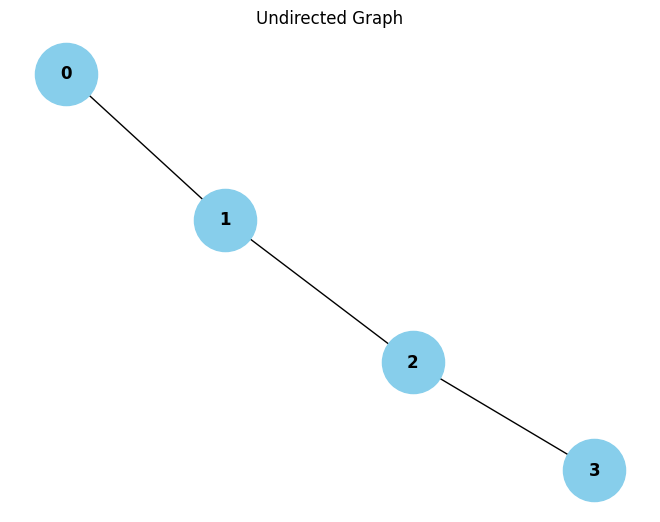

Degree Centrality: {0: 0.3333333333333333, 1: 0.6666666666666666, 2: 0.6666666666666666, 3: 0.3333333333333333}


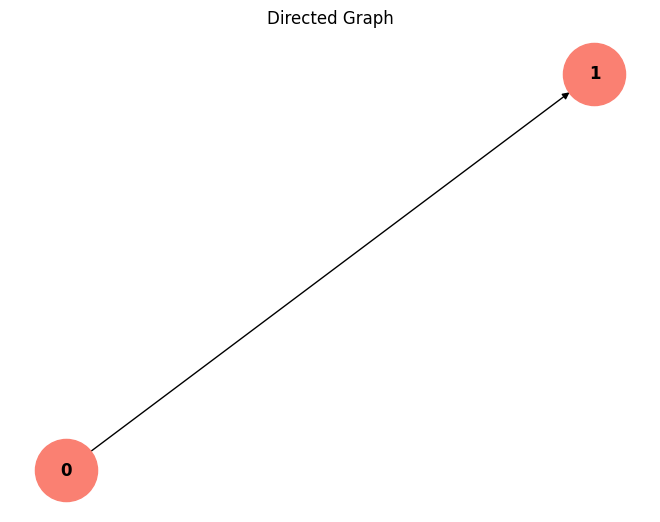

In-degree: {0: 0, 1: 1}
Out-degree: {0: 1, 1: 0}
Laplacian Matrix:
 [[ 1 -1  0  0]
 [-1  2 -1  0]
 [ 0 -1  2 -1]
 [ 0  0 -1  1]]
Eigenvalues of Laplacian Matrix: [3.41421356e+00 2.00000000e+00 9.23055176e-17 5.85786438e-01]
Eigenvectors of Laplacian Matrix:
[[ 0.27059805  0.5        -0.5        -0.65328148]
 [-0.65328148 -0.5        -0.5        -0.27059805]
 [ 0.65328148 -0.5        -0.5         0.27059805]
 [-0.27059805  0.5        -0.5         0.65328148]]
Fiedler Vector (Second Smallest Eigenvalue): [-0.65328148 -0.27059805  0.27059805  0.65328148]
Laplacian Matrix (Directed Graph):
 [[ 1 -1]
 [ 0  0]]
Laplacian Matrix for Weighted Graph:
 [[ 0.5 -0.5  0. ]
 [-0.5  0.8 -0.3]
 [ 0.  -0.3  0.3]]
Incidence Matrix:
 [[1. 0. 0.]
 [1. 1. 0.]
 [0. 1. 1.]
 [0. 0. 1.]]
x^T L x: 9


In [5]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Create an adjacency matrix (as an example)
adj_matrix = np.array([[0, 1, 0, 0],
                       [1, 0, 1, 0],
                       [0, 1, 0, 1],
                       [0, 0, 1, 0]])

# Create an undirected graph from the adjacency matrix
G = nx.from_numpy_array(adj_matrix)

# Visualize the graph
nx.draw(G, with_labels=True, font_weight='bold', node_color='skyblue', node_size=2000)
plt.title("Undirected Graph")
plt.show()

# Compute degree centrality
degree_centrality = nx.degree_centrality(G)
print("Degree Centrality:", degree_centrality)

# Directed Graph Example (Example 4.2.1)
# Adjacency matrix for a directed graph (2-node example)
directed_adj_matrix = np.array([[0, 1],
                                [0, 0]])

# Visualize directed graph
# Use nx.from_numpy_array instead of nx.from_numpy_matrix
# nx.from_numpy_matrix is deprecated and replaced by nx.from_numpy_array
G_directed = nx.from_numpy_array(directed_adj_matrix, create_using=nx.DiGraph)
nx.draw(G_directed, with_labels=True, font_weight='bold', node_color='salmon', node_size=2000)
plt.title("Directed Graph")
plt.show()

# Compute in-degree and out-degree
in_degree = G_directed.in_degree()
out_degree = G_directed.out_degree()
print(f"In-degree: {dict(in_degree)}")
print(f"Out-degree: {dict(out_degree)}")

# Compute Laplacian matrix for undirected graph
laplacian_matrix = nx.laplacian_matrix(G).todense()
print("Laplacian Matrix:\n", laplacian_matrix)

# Eigenvalues and Eigenvectors of the Laplacian matrix
eigenvalues, eigenvectors = np.linalg.eig(laplacian_matrix)
print(f"Eigenvalues of Laplacian Matrix: {eigenvalues}")
print(f"Eigenvectors of Laplacian Matrix:\n{eigenvectors}")

# Fiedler vector (second smallest eigenvalue)
# This is the eigenvector corresponding to the second smallest eigenvalue
# which is useful in graph partitioning
fiedler_vector = eigenvectors[:, np.argsort(eigenvalues)[1]]
print("Fiedler Vector (Second Smallest Eigenvalue):", fiedler_vector)

# Laplacian Matrix for the directed graph
laplacian_directed = nx.laplacian_matrix(G_directed).todense()
print("Laplacian Matrix (Directed Graph):\n", laplacian_directed)

# Adjacency matrix for a weighted graph (Example 4.2.2)
weighted_adj_matrix = np.array([[0, 0.5, 0],
                                [0.5, 0, 0.3],
                                [0, 0.3, 0]])

# Compute Laplacian matrix for weighted graph
# Use nx.from_numpy_array instead of the deprecated nx.from_numpy_matrix
laplacian_weighted = nx.laplacian_matrix(nx.from_numpy_array(weighted_adj_matrix)).todense()
print("Laplacian Matrix for Weighted Graph:\n", laplacian_weighted)

# Incidence matrix for a simple graph
incidence_matrix = nx.incidence_matrix(G, oriented=False).todense()
print("Incidence Matrix:\n", incidence_matrix)

# Example of calculating x^T L x (spectral graph theory)
# x should have the same dimension as the number of nodes in the graph
x = np.array([1, -1, 1, 0])  # Example vector, modified to have 4 elements
result = np.dot(np.dot(x.T, laplacian_matrix), x)
print("x^T L x:", result)

***Explanation of Key Concepts***

1. **Graph Representation**:
   - A graph is represented using an **adjacency matrix**, where the entry at position (i, j) indicates the presence (or weight) of an edge between nodes i and j.
   - **Undirected graphs** have symmetric adjacency matrices, while **directed graphs** have asymmetric adjacency matrices.

2. **Degree Centrality**:
   - The **degree** of a node is the number of edges connected to it. In an undirected graph, degree centrality counts both incoming and outgoing edges. For directed graphs, the **in-degree** counts incoming edges, and the **out-degree** counts outgoing edges.

3. **Laplacian Matrix**:
   - The **Laplacian matrix** is crucial in spectral graph theory and is defined as $L = D - A$, where D is the degree matrix (a diagonal matrix where the diagonal elements are the degrees of the nodes), and A is the adjacency matrix.
   - The **eigenvalues and eigenvectors** of the Laplacian matrix are key to understanding the structure of a graph, especially for graph partitioning and clustering.

4. **Fiedler Vector**:
   - The **second smallest eigenvector** (Fiedler vector) of the Laplacian matrix is used for **graph partitioning**. The sign of the Fiedler vector’s components can be used to split the graph into two parts, which is a common technique in spectral clustering.

5. **Weighted Graphs**:
   - For **weighted graphs**, the adjacency matrix entries represent the weight of the edges. The Laplacian matrix can be adapted for weighted graphs, which can be applied to network flow or other applications where the strength of the connection matters.

---

### Output from the Code:

- **Degree Centrality** shows the relative importance of each node.
- **In-degree** and **Out-degree** are displayed for the directed graph.
- The **Laplacian matrices** (undirected, directed, and weighted) are computed and displayed.
- **Eigenvalues** and **Eigenvectors** of the Laplacian are calculated, and the Fiedler vector is highlighted for partitioning tasks.
- Finally, an example calculation of $x^T L x$ is provided for spectral graph theory.